# Final Asignment

Seven Sins Restobar

A new restaurant startup has born in German Village, and three people are working very extensive hours to make things happen. The entry barriers are high, as there is such a huge contest against big companies to attract people that could buy their products/services. 
As an EVS new initiative, the idea is to support new local businesses to achieve prosperity in the region, and you were selected to develop a study that could lead them to improve their results. 
The success is vital for these people, as their growth will bring new people and increase employment.
With a bunch of effort and energy, they have been collecting reviews from friends, family and new customers, and they have stored them in a tiny dataset, which consists in two features:
-The restaurant review
-The thumb of nail critic: They did or did not like the service received.
Right now, they don’t have enough time to conduct any sort type of analysis coming from them. So they don’t know what to do in terms of strategy.
As a data science analyst, you are requested to perform an analysis on the data that they have and give them some feedback. Your critical thinking is your best friend for developing a case, and support it with data driven conclusions.
But you’re not alone in this process: You are part of a talented people team, and all of you are using this opportunity to escalate and generate more impact in our community. The person in charge only expects from you a Python code (.py file), with the possibility to include comments and all sort type of data driven analysis (Markdown is your friend). Due the lack of time and resources available: Your opinion and recommendations will only be considered if they are clear and follow a convincing and clear path and objective.
There have 500 labeled reviews (Liked 1; Disliked: 0).
They have other 500 reviews, but unlabeled: A model is required for classifying them.

Your boss requires a python (.py) file that includes:
•	Dataset review (descriptive)
•	Pre-processing steps and methods.
•	Define a main objective: What is the object of your study? To analyze the relation of certain type of products/services with the feedback? Detect things that lead people to write positive/negative reviews? A mixture? To classify new upcoming reviews? Why?
•	The feature engineering process (techniques used, commented).
•	A model selection process (parameters, candidates, selected (why?) and evaluated metrics).
•	Analysis based in selected model.
•	Final conclusion and recommendation(s) (be concise) 


# Importing Data

In [16]:
# Importing the libraries
import pandas as pd
import re 
import nltk 

In [95]:
#Importing the dataset
reviews_df = pd.read_csv('Seven_Sins_Restobar.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')

In [99]:
#Lets see what we find...
reviews_df.head(10)

Review  Liked
0  "I also had to taste my Mom's multi-grain pump...      1
1          "I'd rather eat airline food, seriously."      0
2      Cant say enough good things about this place.      1
3                       The ambiance was incredible.      1
4          The waitress and manager are so friendly.      1
5                  I would not recommend this place.      0
6         Overall I wasn't very impressed with Noca.      0
7                My gyro was basically lettuce only.      0
8                                  Terrible service!      0
9                           Thoroughly disappointed!      0

In [98]:
reviews_df.tail(10)

Review  Liked
490  I dont think I will be back for a very long time.      0
491  "It was attached to a gas station, and that is...      0
492                               How awesome is that.      1
493                    I will be back many times soon.      1
494  The menu had so much good stuff on it i could ...      1
495  "Worse of all, he humiliated his worker right ...      0
496                    CONCLUSION: Very filling meals.      1
497  Their daily specials are always a hit with my ...      1
498  The pancake was also really good and pretty la...      1
499  "This was my first crawfish experience, and it...      1

In [36]:
# Making the text pretty and ready to analize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicole.medic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
corpus = [] #Intialization of a new list for the 1000 reviews (corpus: collection of text)

for i in range(0, 500):
    Review = re.sub('[^a-zA-Z]', ' ', reviews_df['Review'][i]) #Removes all but letters (and Capitals)
    Review = Review.lower() #Put all the letters in lowercase
    Review = Review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    Review = [ps.stem(word) for word in Review if not word in set(stopwords.words('english'))]
    Review = ' '.join(Review) #For reversing the process (list -> string)
    corpus.append(Review) #Generate a list of one string per observation

In [103]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer #Class that allows tokenization

cv = CountVectorizer(max_features = 1000) #Keepong the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y = reviews_df.iloc[:, 1].values #Defining our response variable

In [104]:
# Importing libraries for Models, roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [105]:
#Separating Data into train and test set to train and then test the model. As we are in the first exploration phase, we
#will run a logistic regression to see how the data is behaving before making any changes to the data set. This way, we
#will be able to see how the final model performs compared to this first one. 
#As we are in the first step, we will use the most common form of partition that is 80/20. We will divide the data set
#into only 2 thata sets because we are not going to compare between models at this point so we don't need a validation
#dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [48]:
# Fit a Logistic Regression Model. We have chosen this model because is the classical one to start when your output 
# variable is categorical, in this case a yes/no dummy variable. It is also the most stable one.  
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
# Predicting the Test set results
lr_y_pred = classifier_lr.predict(X_test)

In [107]:
# Making the Confusion Matrix. With the Confusion Matrix will help us to describe the performance of a 
#classification model.
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)

[[35 15]
 [15 35]]


In [51]:
# predict probabilities
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.768


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold   tpr   fpr
0    1.999911  0.00  0.00
1    0.999911  0.02  0.00
2    0.963908  0.10  0.00
3    0.952055  0.10  0.02
4    0.808690  0.34  0.02
5    0.794672  0.34  0.06
6    0.771599  0.40  0.06
7    0.751255  0.40  0.10
8    0.735760  0.42  0.10
9    0.733391  0.42  0.12
10   0.702609  0.52  0.12
11   0.697616  0.52  0.14
12   0.681008  0.54  0.14
13   0.676496  0.54  0.16
14   0.674784  0.56  0.16
15   0.663734  0.56  0.18
16   0.640720  0.58  0.18
17   0.634032  0.58  0.20
18   0.586230  0.64  0.20
19   0.567556  0.64  0.22
20   0.554834  0.66  0.22
21   0.544225  0.66  0.26
22   0.526270  0.70  0.26
23   0.485879  0.70  0.34
24   0.470072  0.72  0.34
25   0.466426  0.72  0.36
26   0.452494  0.76  0.36
27   0.428239  0.76  0.42
28   0.392767  0.84  0.42
29   0.381911  0.84  0.46
30   0.381492  0.86  0.46
31   0.350426  0.86  0.52
32   0.348744  0.88  0.52
33   0.320811  0.88  0.62
34   0.315424  0.90  0.62
35   0.266787  0.90  0.74
36   0.261844  0.92  0.74
37   0.253786  0.92  0.80
38   0.238886  0.94  0.80
39   0.211520  0.94  0.82
40   0.211244  0.96  0.82
41   0.155739  0.96  0.94
42   0.137476  0.98  0.94
43   0.088363  0.98  1.00
44   0.049517  1.00  1.00

This seemed very suspicious so I tried to go throug all the process again using another method

# Exploring and Cleaning Data

In order to have a better understanding of our data, let’s explore it a little:

In [108]:
reviews_df.head(2)

Review  Liked
0  "I also had to taste my Mom's multi-grain pump...      1
1          "I'd rather eat airline food, seriously."      0

In [109]:
reviews_df.tail(2)

Review  Liked
498  The pancake was also really good and pretty la...      1
499  "This was my first crawfish experience, and it...      1

In [110]:
#See how many columns and rows we have
reviews_df.shape

(500, 2)

In [111]:
#From this we can see that we don't have any missing values. We also know that review is an objeti type variable because
#is cualitative and liked is converted into a dummy variable
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Review    500 non-null object
Liked     500 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [113]:
# See Liked variable distribution. As we can see, the distribution on this variable is perfectly balance. There is the
#same amount of likes (1) and dislikes (0). This information will be very useful for the modelling part.
reviews_df["Liked"].value_counts(normalize = True)

1    0.5
0    0.5
Name: Liked, dtype: float64

In [114]:
!pip install -U nltk
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

Requirement already up-to-date: nltk in c:\programdata\anaconda3\lib\site-packages (3.4.5)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nicole.medic\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicole.medic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nicole.medic\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [115]:
# Return the wordnet object value corresponding to the POS tag

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# New column with clean text data
reviews_df["review_clean"] = reviews_df["Review"].apply(lambda x: clean_text(x))

To clean textual data, we call our custom ‘clean_text’ function that performs several transformations:
-lower the text
-tokenize the text (split the text into words) and remove the punctuation
-remove useless words that contain numbers
-remove useless stop words like ‘the’, ‘a’ ,’this’ etc.
-Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
-lemmatize the text: transform every word into their root form ( We have chosen reduce the word-forms to linguistically valid lemmas rather than reduce word-forms to (pseudo)stems with stemming as normalization form)
Now that we have cleaned our data, we can do some feature engineering for our modelization part.

# Feature Engineering

In [118]:
# Adding sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["Review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

We first start by adding sentiment analysis features because we can guess that customers reviews are highly linked to how to weather they liked or not the restobar. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores. For each text, Vader returns 4 values:
-a neutrality score
-a positivity score
-a negativity score
-an overall score that summarizes the previous scores
We will integrate those 4 values as features in our dataset.


In [119]:
# Add number of characters column
reviews_df["nb_chars"] = reviews_df["Review"].apply(lambda x: len(x))

# Add number of words column
reviews_df["nb_words"] = reviews_df["Review"].apply(lambda x: len(x.split(" ")))

In [121]:
#Let's see how our data looks right know
reviews_df.head(2)

Review  Liked  \
0  "I also had to taste my Mom's multi-grain pump...      1   
1          "I'd rather eat airline food, seriously."      0   

                                        review_clean  neg    neu    pos  \
0  also taste mom's multi-grain pumpkin pancake p...  0.0  0.823  0.177   
1              i'd rather eat airline food seriously  0.0  1.000  0.000   

   compound  nb_chars  nb_words  
0    0.6239       123        20  
1    0.0000        41         6

Next, we add some simple metrics for every text:
number of characters in the  and number of words in the text

In [122]:
# Create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(dataset["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)


The next step consist in extracting vector representations for every review. The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What’s interesting is that similar words will have similar representation vectors.
Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.
We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [126]:
# Adding tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

Finally we add the TF-IDF (Term Frequency — Inverse Document Frequency) values for every word and every document.
But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn’t take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.


The TF-IDF metric solves this problem:
TF computes the classic number of times the word appears in the text
IDF computes the relative importance of this word which depends on how many texts the word can be found
We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

# Exploratory Data Analysis

In [129]:
#Now let’s print some wordclouds to have a glimpse at what kind of words apear in our liked column (variable)
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [135]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["Review"])

As we can see, most of the words are related to the experience on the restaurant: "food", "ambiance", "waitress", "pancake" etc. We can also see some strong negative words as "humiliated" and "worse". As this first look at the reviews seems consistence with the distribution from above as we can find strong positive and strong negative words. 

In [137]:
# Lets see the highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review", "pos"]].head(10)


Review    pos
103           "Good value, great food, great service."  0.871
37   "Great steak, great sides, great wine, amazing...  0.801
225                    Great food and awesome service!  0.739
183               "Very good food, great atmosphere.1"  0.716
64                  Generous portions and great taste.  0.712
301                    And service was super friendly.  0.703
85   Great food and great service in a clean and fr...  0.701
171                   I promise they won't disappoint.  0.695
189                       "Good food , good service ."  0.659
289     "Great atmosphere, friendly and fast service."  0.646

The most positive reviews indeed correspond to some good feedbacks as we had predicted.

In [138]:
# Lets see the lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Review", "neg"]].head(10)


Review    neg
388                   Seriously killer hot chai latte.  0.667
61                        After two I felt disgusting.  0.531
466                         The manager was the worst.  0.506
398  Highly unprofessional and rude to a loyal patron!  0.502
80                          Boy was that sucker dry!!.  0.499
326                    Food quality has been horrible.  0.467
359            Worst food/service I've had in a while.  0.451
403                 "And the drinks are WEAK, people!"  0.440
426  "It was so bad, I had lost the heart to finish...  0.439
311                   The service was terrible though.  0.437

Is doesnt seem as we are having errors using Vader. At least the shown reviews are negative ones but we don't know as we are only seeing 10 rows. Sometimes Vader interpret words as "No" or "nothing" as negative 

    
    

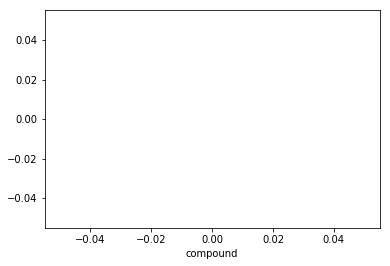

In [140]:
# Ploting sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['Review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

The above graph shows the distribution of the reviews sentiments among good reviews and bad ones. 

In [141]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "Review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

KeyError: 'is_bad_review'

I wanted to model bad revies and then model good reviews. And compare the two models by the AUC ROC 